## Data Assignment 5
Tony Nguyen

CPSC 222 01

11/08/2022

I attempted half of the bonus question

In [1]:
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/tony/Documents/Python/CPSC222/DA5/utils.py'>

### Data Loading

This dataset contains information about 4,555 inpatients at rehabilitation hospitals, which have been de-identified and randomized, that we will perform exploratory data analysis (EDA) on.

The attributes of this dataset include:
* `ID`: Index of the dataset
* `Gender`: "M" for male and "F" for female
* `Age`: Years of age of the patient
* `Marital Status`: The description of the patient's marital status
* `RIC`: Rehabilitation Impairment Category. RIC follows the *Centers of Medicaid and Medicare Services IRF-PAI training manual*
* `Admission Total FIM Score`: The admission of total Functional Independence Measure (FIM) scores of the patients.
* `Discharge Total FIM Score`: The discharge total Functional Independence Measure (FIM) scores of the patients.

Functional Independence Measure (FIM) is a clinical assessment used to measure patient functioning at inpatient rehabilitation hospitals, which is measured at two distinct points in time: admission and discharge. The FIM takes into account the level of assistance required to perform 18 activities of daily living tasks (13 motor and 5 cognitive activities) on a scale of 7-point for each task.

In [2]:
data = utils.data_loading("patient_data_to_clean.csv")
data

,Gender,Age,Marital Status,RIC,Admission Total FIM Score,Discharge Total FIM Score
ID,,,,,,
0,M,80,Widowed,8,40,89
1,M,90,Divorced,1,65,75
2,M,53,Married,2,67,99
3,F,69,Married,15,41,67
4,F,80,Married,3,66,65
...,...,...,...,...,...,...
4550,F,20,Married,4,39,61
4551,M,82,Widowed,3,59,50
4552,M,44,Married,18,39,96


### Data Cleaning
In order to perform EDA on this dataset, we need to do some cleaning on `Marital Status` and `RIC` column.

For `Marital Status`, it contains free responses for clinicians to enter, which results in a lot of non-uniform categories. I attempt to categorize them into five categories: 
* Never married
* Divorced
* Married
* Widowed 
* Separated

According to an [article](https://measuringu.com/confidence-levels/) by Dr. Jeff Sauro, an author and a statistical analyst, confidence intervals (CI) of 80% can be used for exploratory findings. And since this project is an EDA, I assume CI of 80% when performing data cleaning for `Marital Status` to take into account the possibility of  misspelling. If there is an instance that has at least 80% of its characters match one of the five categories above, it will be written with the corresponding category. Otherwise, the remaining values are assigned `np.NaN`. Also, it is worth noting that there is a number of instances named "Single" and "Engaged" that I consider as "Never married" and "Married", respectively, for the purpose of this EDA.

Besides, there are two patients who have their `Marital Status` listed as "DIV" and "rried". These two patients' status should have been rewritten with `np.NaN` as they failed to archive 80% CI, but I felt like we could make the case for these patients. With "DIV", it can be reasonably inferred as "Divorced" since there is no other type of marital status contains "DIV". It is also the same for "rried" and "Married". Therefore, I manually overwritte these two cases with their corresponding status as explained above, resulted in a total of **12** values that are assigned `np.NaN`.

For `RIC`, I convert the RIC number code into text labels.
1. "Stroke"
1. "TBI": (Traumatic brain injury)
1. "NTBI" (Non-traumatic brain injury)
1. "TSCI" (Traumatic spinal cord injury)
1. "NTSCI" (Non-traumatic spinal cord injury)
1. "Neuro" (Neurologic conditions)
1. "FracLE" (Fracture, lower extremity)
1. "ReplLE" (Joint replacement, lower extremity)
1. "Ortho" (Other orthopaedic)
1. "AMPLE" (Amputation, lower extremity)
1. "AMP-NLE"(Amputation, upper extremity or other)
1. "OsteoA" (Osteoarthritis)
1. "RheumA" (Rheumatoid arthritis)
1. "Cardiac" (Cardiac disorders)
1. "Pulmonary" (Pulmonary disorders)
1. "Pain" (Pain syndromes)
1. "MMT-NBSCI" (Major multiple trauma, non brain injury or spinal cord injury)
1. "MMT-BSCI" (Major multiple trauma, brain injury or spinal cord injury)
1. "GB": (Guillain-Barre Syndrome)
1. "Misc" (Miscellaneous)
1. "Burns"

After cleaning, the "cleaned" data is saved as a .csv file. It is also displayed below.

In [3]:
data = utils.data_cleaning(data)
data

,Gender,Age,Marital Status,RIC,Admission Total FIM Score,Discharge Total FIM Score
ID,,,,,,
0,M,80,Widowed,ReplLE,40,89
1,M,90,Divorced,Stroke,65,75
2,M,53,Married,TBI,67,99
3,F,69,Married,Pulmonary,41,67
4,F,80,Married,NTBI,66,65
...,...,...,...,...,...,...
4550,F,20,Married,TSCI,39,61
4551,M,82,Widowed,NTBI,59,50
4552,M,44,Married,MMT-BSCI,39,96


### Data Aggregation
A Pandas `Series` is constructed to display the following information:
* patients_total: total number of patients
* males_total: total number of males
* females_total: total number of females
* married_total: total number of married patients
* most_common_RIC: RIC label for the most commonly occurring RIC
* most_common_RIC_total: total number of patients with the most commonly occurring RIC
* stroke_age_avg: mean age for stroke patients
* stroke_age_std: standard deviation of age for stroke patients
* stroke_age_male_avg: mean age for male stroke patients
* stroke_age_male_std: standard deviation of age for male stroke patients
* stroke_age_female_avg: mean age for female stroke patients
* stroke_age_female_std: standard deviation of age for female stroke patients

The mean formula: $$\mu = \frac{sum}{number}$$

The standard deviation formula:  $$\sigma = \sqrt{\frac{\sum (x - \overline{x})^2}{n - 1}}$$

From the data listed below, we can see the number of female patients is *71* people higher than the male patients. The most common RIC recorded is *"Stroke"*, with *1169* cases recorded. And within the "Stroke" group, its $\mu$ is *71.29* and $\sigma$ is *14.34*.  
The mean age of male patient with "Stroke" RIC is *70.08* while it is *72.60* with female. For the standard deviation of age, it is *13.84* for male and *14.76* for female.

In [4]:
data_agg = utils.data_aggregation(data)
data_agg

patients_total                4555
males_total                   2242
females_total                 2313
married_total                 2280
most_common_RIC             Stroke
most_common_RIC_total         1169
stroke_age_avg           71.292558
stroke_age_std           14.340883
stroke_age_male_avg       70.07743
stroke_age_male_std      13.841474
stroke_age_female_avg    72.604982
stroke_age_female_std    14.761702
dtype: object

### Data Visualization
For each RIC with *enough data*, we will draw an age histogram and a FIM scatter plot. Since there is no absolute definition of what constitutes *enough data*, I assume the 80% confidence interval of EDA as mentioned above, meaning in each RIC type, at least 80% instances must not be `np.NaN`. In conjunction to that, as the histogram parameter has 30 bins, it will only be statistically sound if we have at least double the bin, which is 60 instances.

For each qualified RIC type, I plot an Age histogram and a FIM scatterplot.

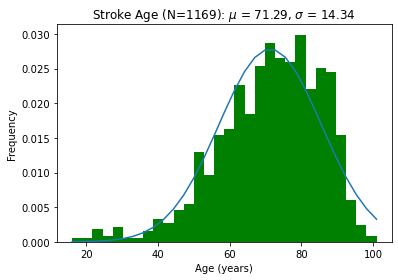

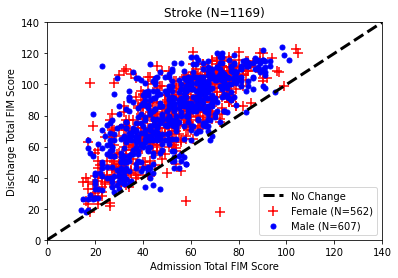

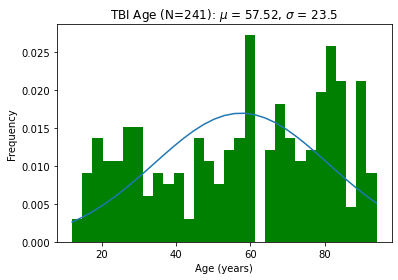

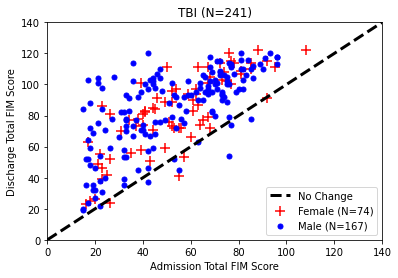

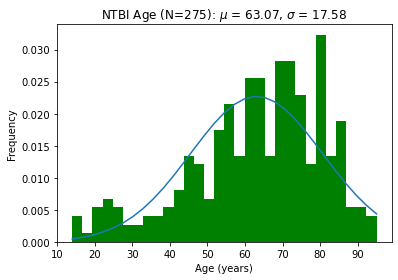

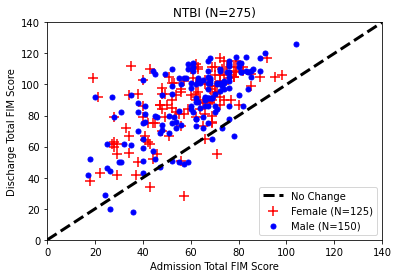

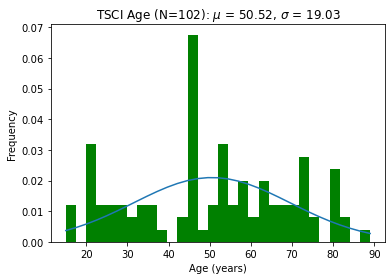

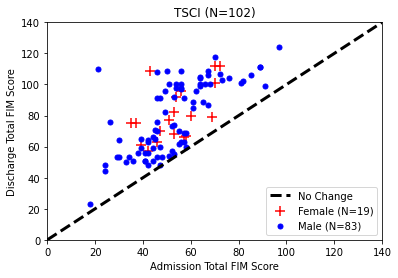

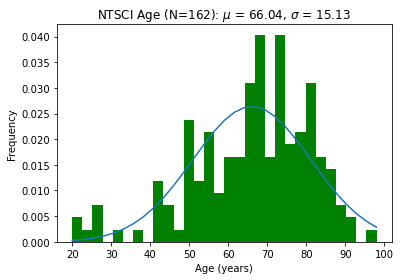

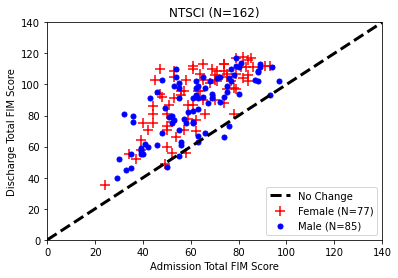

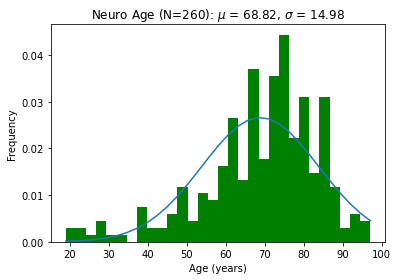

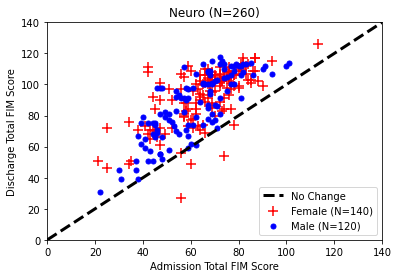

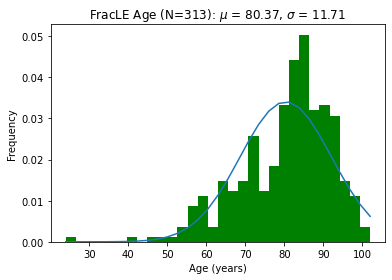

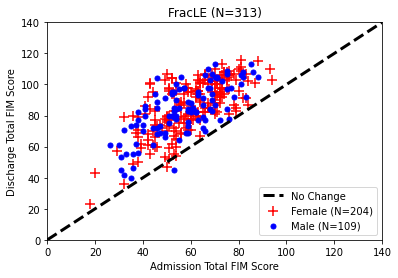

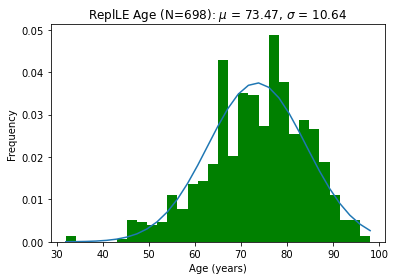

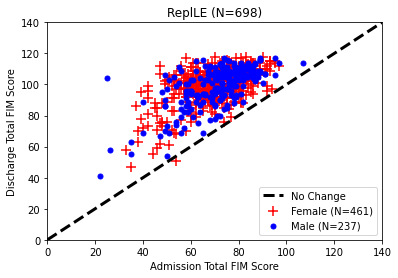

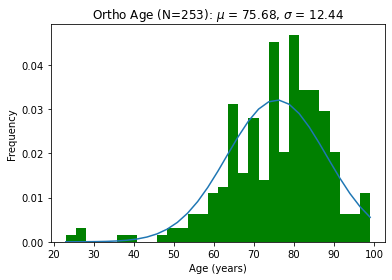

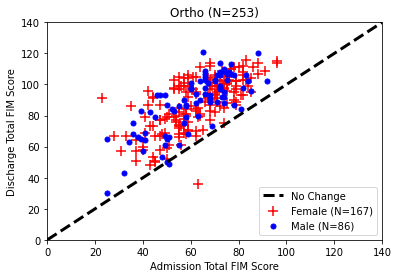

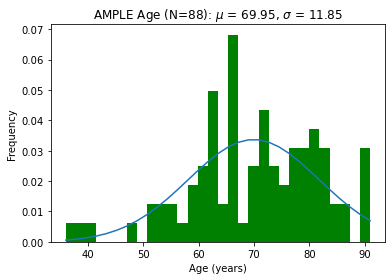

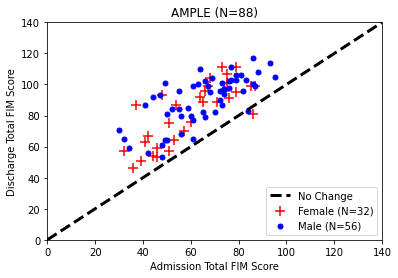

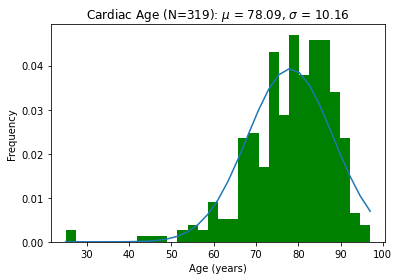

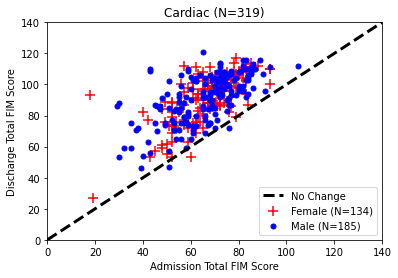

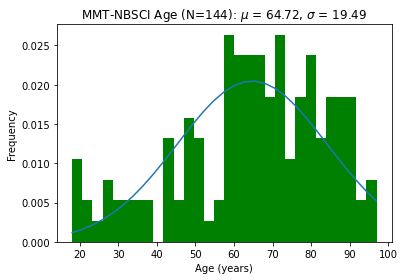

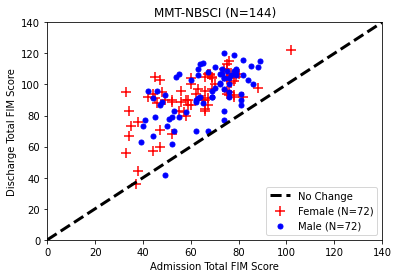

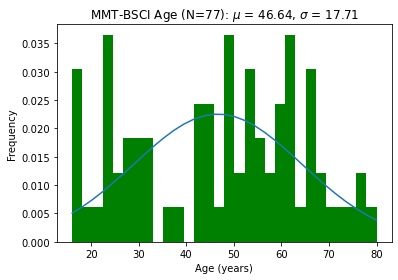

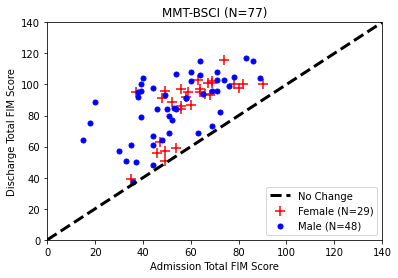

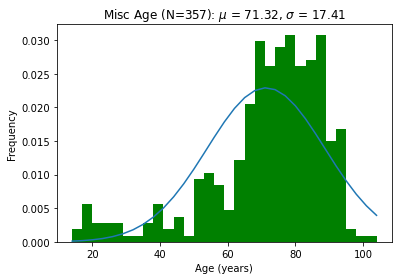

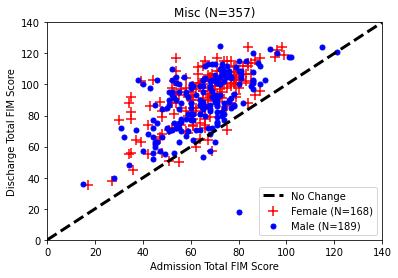

In [5]:
utils.check_instances(data)